In [15]:
import numpy as np
import matplotlib.pyplot as plt

In [16]:
import matplotlib
matplotlib.rcParams['text.usetex'] = True
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"],
})

In [66]:
# select scheme
scheme_name = str("Roe")
# if-else statement
path = "2nd-order-isentropic/Van-Leer/" if scheme_name == "Van-Leer" else "2nd-order-isentropic/Roe/"

## Iterative convergence

In [67]:
cell_list = ["10", "20", "40", "80", "160", "320"]

In [68]:
conv_steps_van = np.array([4098, 8894, 17699, 35557, 70946, 141622])
conv_steps_roe = np.array([3806, 8458, 17782, 35729, 71092, 141763])
conv_steps = conv_steps_van if scheme_name == "Van-Leer" else conv_steps_roe

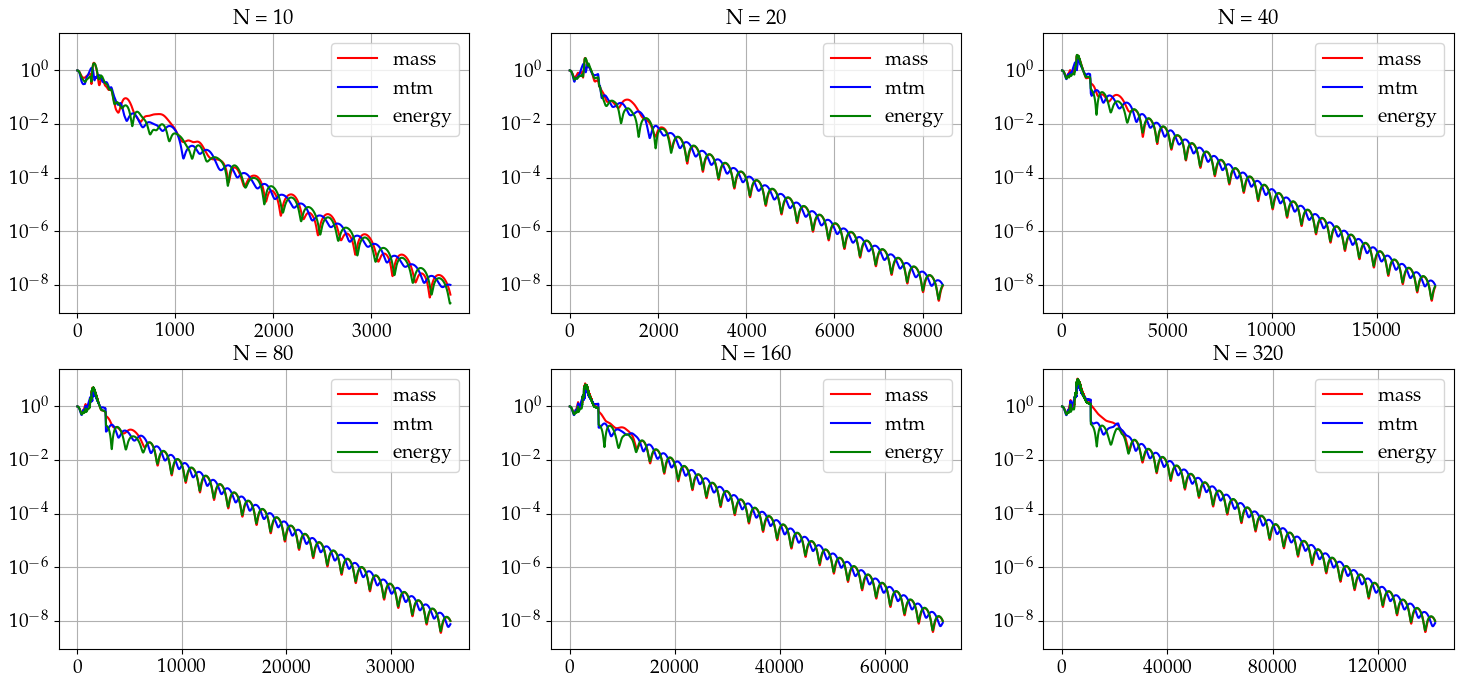

In [69]:
fig, axs = plt.subplots(2, 3, figsize=(18, 8))
for (i, cell) in enumerate(cell_list):
    m = i//3; n = i%3;
    resi = np.loadtxt(path + "residual_{}.txt".format(cell))[0:int(conv_steps[i])]
    axs[m][n].semilogy(np.arange(0,int(conv_steps[i])), resi[:,0]/resi[0,0], 'r', label="mass")
    axs[m][n].semilogy(np.arange(0,int(conv_steps[i])), resi[:,1]/resi[0,1], 'b', label="mtm")
    axs[m][n].semilogy(np.arange(0,int(conv_steps[i])), resi[:,2]/resi[0,2], 'g', label="energy")
    axs[m][n].grid()
    axs[m][n].xaxis.set_tick_params(labelsize=14)
    axs[m][n].yaxis.set_tick_params(labelsize=14)
    axs[m][n].set_ylim(0.9*10**(-9), 25)
    axs[m][n].legend(fontsize=14)
    axs[m][n].set_title("N = {}".format(cell),fontsize=15)
axs[0][2].set_xticks([0,5000,10000,15000])
axs[1][0].set_xticks([0,10000,20000,30000])
axs[1][1].set_xticks([0,20000,40000,60000])
axs[1][2].set_xticks([0,40000,80000,120000])
plt.savefig("figs/{}-2nd_order_residual.pdf".format(scheme_name),bbox_inches='tight')
plt.show()

## Code verification

In [70]:
Ma_exact_80 = np.loadtxt(path + "Ma_exact_80.txt")

Ma_cal_40 = np.loadtxt(path + "Ma_40.txt")
xcell_40 = np.loadtxt(path + "xcell_40.txt")
Ma_cal_80 = np.loadtxt(path + "Ma_80.txt")
xcell_80 = np.loadtxt(path + "xcell_80.txt")
Ma_cal_160 = np.loadtxt(path + "Ma_160.txt")
xcell_160 = np.loadtxt(path + "xcell_160.txt")

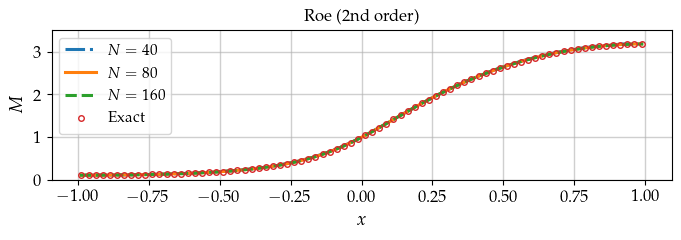

In [71]:
fig, axs = plt.subplots(1, 1, figsize=(8, 1.95))
fig.subplots_adjust(hspace=0.55)

axs.plot(xcell_40, Ma_cal_40[2:-2], 'C0-.',label=r'$N=40$', linewidth=2.2)
axs.plot(xcell_80, Ma_cal_80[2:-2], 'C1-',label=r'$N=80$', linewidth=2.2)
axs.plot(xcell_160, Ma_cal_160[2:-2], 'C2--',label=r'$N=160$', linewidth=2.2)
axs.plot(xcell_80, Ma_exact_80, 'C3o', label='Exact', markersize=4, markeredgewidth=1, markerfacecolor='none')
axs.set_title("{} (2nd order)".format(scheme_name))

# axs[1].plot(xcell_80, Ma_cal_80[2:-2], 'C1-',label=r'Calculated ($N=80$)', linewidth=2.2)
# axs[1].plot(xcell_80, Ma_exact_80, 'C2o', label='Exact', markersize=4, markeredgewidth=1, markerfacecolor='none')
# axs[1].set_title("{} (2nd order)".format(scheme_name))

axs.set_xlabel(r"$x$",fontsize=13)
axs.set_ylabel(r"$M$",fontsize=13)
axs.set_ylim(0,3.5)
axs.legend(fontsize=11)
axs.grid(linewidth=1, alpha=0.6)
axs.tick_params(axis='x', labelsize=12)
axs.tick_params(axis='y', labelsize=12)

plt.savefig("figs/{}_code-verification.pdf".format(scheme_name),bbox_inches='tight')
plt.show()

## observed order of accuracy

In [7]:
def getInfiNorm(mat1, mat2):
    return np.max(abs(mat1-mat2))

In [8]:
def getL2Norm(mat1,mat2):
    return np.sqrt(np.mean((mat1-mat2)**2))

### Van Leer & Roe

In [9]:
infiNorm_arr = np.zeros(6)
l2Norm_arr = np.zeros(6)
h_arr = np.array([1, 2, 4, 8, 16, 32])
for (i, cell) in zip(range(0,6), cell_list):
    U = np.loadtxt(path + "U_{}.txt".format(cell))
    U_exact = np.loadtxt(path + "U_exact_{}.txt".format(cell))
    infi_norm = getInfiNorm(U[2:-2,0], U_exact[:,0])
    l2_norm = getL2Norm(U[2:-2,0], U_exact[:,0])
    infiNorm_arr[i] = infi_norm
    l2Norm_arr[i] = l2_norm

In [10]:
OoA_infi = np.zeros(5)
OoA_l2 = np.zeros(5)
for i in range(0,5):
    OoA_infi[i] = np.log10(abs(infiNorm_arr[::-1][i+1]/infiNorm_arr[::-1][i]))/np.log10(2)
    OoA_l2[i] = np.log10(abs(l2Norm_arr[::-1][i+1]/l2Norm_arr[::-1][i]))/np.log10(2)

In [11]:
x = np.linspace(0.8, 40, 100)
y1 = x/150
y2 = x**2/3000

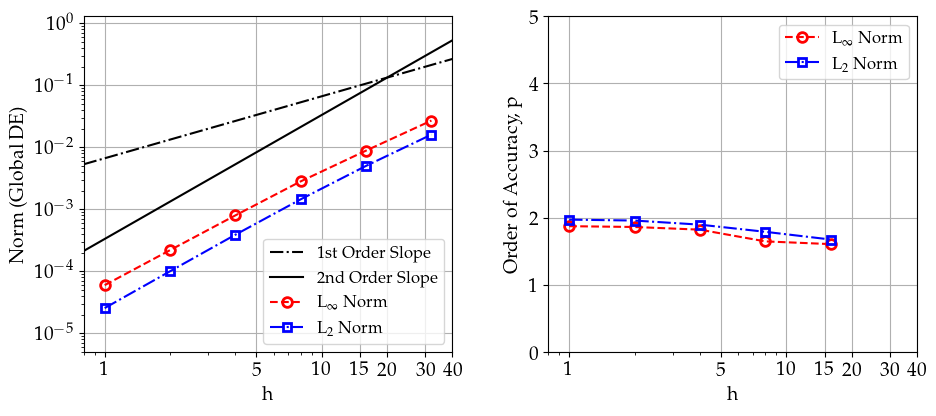

In [12]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4.8))
# subfigure 1
axs[0].loglog(x,y1,'k-.',label="1st Order Slope")
axs[0].loglog(x,y2,'k-',label="2nd Order Slope")
axs[0].loglog(h_arr,infiNorm_arr[::-1],linestyle='--',marker='o',markersize=7,color='red',\
          markeredgewidth=2,markerfacecolor="None",label=r"L$_\infty$ Norm")
axs[0].loglog(h_arr,l2Norm_arr[::-1],linestyle='-.',marker='s',markersize=6.3,color='blue',\
          markeredgewidth=2,markerfacecolor="None",label=r"L$_2$ Norm")
axs[0].set_ylim(0.5*10**(-5), 1.3)
axs[0].set_ylabel("Norm (Global DE)",fontsize=14)

# subfigure2
axs[1].plot(h_arr[0:-1],OoA_infi,linestyle='--',marker='o',markersize=7,color='red',\
          markeredgewidth=2,markerfacecolor="None",label=r"L$_\infty$ Norm")
axs[1].plot(h_arr[0:-1],OoA_l2,linestyle='-.',marker='s',markersize=6.3,color='blue',\
          markeredgewidth=2,markerfacecolor="None",label=r"L$_2$ Norm")
axs[1].set_ylim(0,5)
axs[1].set_xscale('log')
axs[1].set_ylabel("Order of Accuracy, p",fontsize=14)

for i in range(0,2):
    axs[i].grid()
    axs[i].set_xlabel('h',fontsize=14)
    axs[i].set_xlim(0.8, 40)
    axs[i].set_xticks([1,5,10,15,20,30,40],['1','5','10','15','20','30','40'])
    axs[i].legend(fontsize=12)
    axs[i].xaxis.set_tick_params(labelsize=14)
    axs[i].yaxis.set_tick_params(labelsize=14)

fig.tight_layout(pad=3.0)
plt.savefig("figs/{}-2nd_order-of-accuracy.pdf".format(scheme_name),bbox_inches='tight')
plt.show()